This notebook documents the behavior of the ns3-lte module and our power control environment.

In [2]:
import os

import matplotlib.pyplot as plt
import pandas as pd

NS3_HOME = os.getenv("NS3_HOME")

### Test 1
- 1 BS (static at (0,0,1))
- 1 UE with constant velocity (100 m/s)
- same propagation model each run (friis)
- same noise figure at UE and BS each run (default values)
- varying transmit powers over different runs

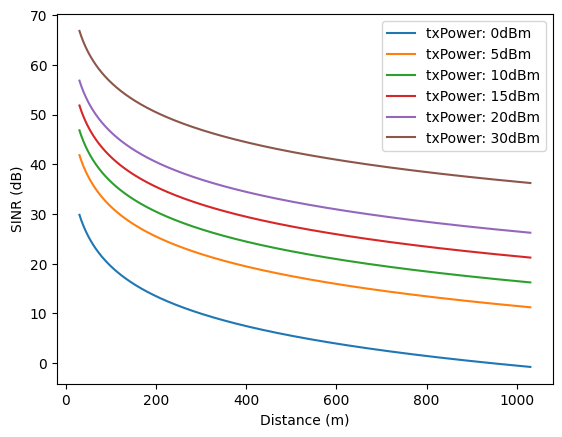

In [2]:
test1_df = pd.read_csv(NS3_HOME + "/contrib/defiance/experiments/results/test1.csv")
tx_powers = test1_df.action.unique()
for tx_power in tx_powers:
    df_tx_power = test1_df[test1_df.action == tx_power]
    plt.plot(df_tx_power.distances, df_tx_power.sinrs, label=f"tx_power: {tx_power}dBm")
plt.xlabel("Distance (m)")
plt.ylabel("SINR (dB)")
plt.legend()
plt.show()

## Test 1_1
- setting the Speed of the UE to 50 m/s

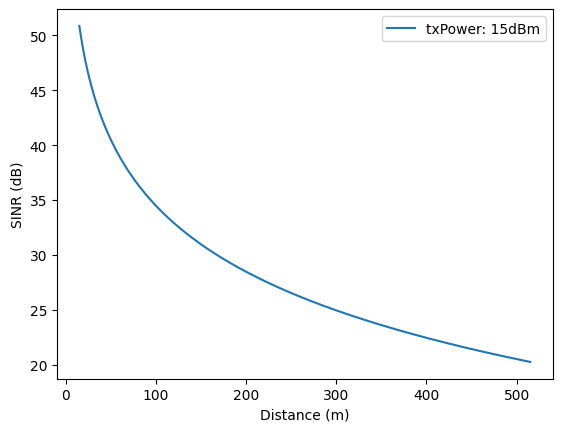

In [3]:
test1_1_df = pd.read_csv(NS3_HOME + "/contrib/defiance/experiments/results/test1_1.csv")
tx_powers = test1_1_df.action.unique()
for tx_power in tx_powers:
    df_tx_power = test1_1_df[test1_1_df.action == tx_power]
    plt.plot(df_tx_power.distances, df_tx_power.sinrs, label=f"tx_power: {tx_power}dBm")
plt.xlabel("Distance (m)")
plt.ylabel("SINR (dB)")
plt.legend()
plt.show()

### Test 2
- tests the behavior of different propagation models
- 1 static BS, 1 UE (100 m/s)
- constant transmit power for each run (15 dBm)
- varying propagation models -> the default attributes for these propagation loss models where used

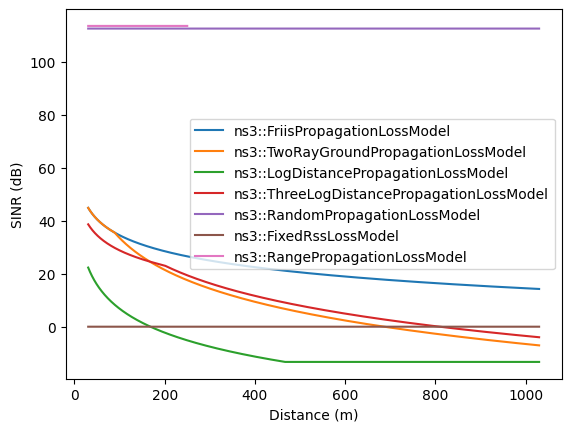

In [4]:
test2_df = pd.read_csv(NS3_HOME + "/contrib/defiance/experiments/results/test2.csv")
prop_models = test2_df.propagationModel.unique()
for model in prop_models:
    df_model = test2_df[test2_df.propagationModel == model]
    plt.plot(df_model.distances, df_model.sinrs, label=f"{model}")
plt.xlabel("Distance (m)")
plt.ylabel("SINR (dB)")
plt.legend()
plt.show()

### Test 3_1
- baseline for interference test
- static bs and ue: tx_power is set at different time steps
- distance = 0 meters
- 0-500 steps: tx=0
- 500-1000 steps: tx=10
- 1000-1500 steps: tx=15
- 1500-2000 steps: tx=20

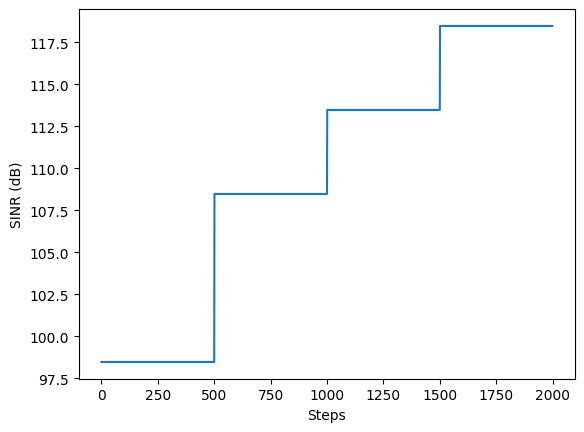

In [5]:
import ast

test3_1_df = pd.read_csv(NS3_HOME + "/contrib/defiance/experiments/results/test3_1.csv")


def convert_to_list(string: str) -> list[str] | str:
    try:
        return ast.literal_eval(string)
    except (SyntaxError, ValueError):
        # Return None if conversion fails
        return string


for col in test3_1_df.columns:
    test3_1_df[col] = test3_1_df[col].apply(convert_to_list)

test3_1_df = test3_1_df.drop(columns=["Unnamed: 0"])
plt.plot(test3_1_df.sinrs.apply(lambda x: x[0][0]))
plt.xlabel("Steps")
plt.ylabel("SINR (dB)")
plt.show()

### Test 3_2
- tests the effect of Interference (until now we only considered the effect of noise)
- 2 BS with a Distance of 1km to each other
- 2 UEs with a fixed distance of 500m to their corresponding base station
- static scenario: no handover; connection to the closest BS 
- 0-500 steps: tx=(0,0)
- 500-1000 steps: tx=(10,0)
- 1000-1500 steps: tx=(15,10)
- 1500-2000 steps: tx=(20,10)
- 2000-2500 steps: tx=(20,20)

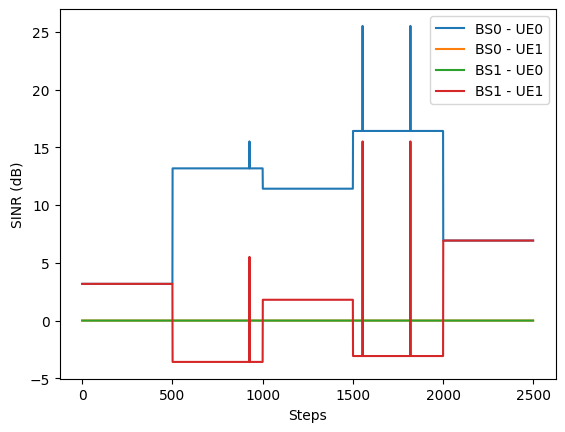

In [6]:
test3_2_df = pd.read_csv(NS3_HOME + "/contrib/defiance/experiments/results/test3_2.csv")

for col in test3_2_df.columns:
    test3_2_df[col] = test3_2_df[col].apply(convert_to_list)

test3_2_df = test3_2_df.drop(columns=["Unnamed: 0"])
plt.plot(test3_2_df.sinrs.apply(lambda x: x[0][0]), label="BS0 - UE0")
plt.plot(test3_2_df.sinrs.apply(lambda x: x[0][1]), label="BS0 - UE1")
plt.plot(test3_2_df.sinrs.apply(lambda x: x[1][0]), label="BS1 - UE0")
plt.plot(test3_2_df.sinrs.apply(lambda x: x[1][1]), label="BS1 - UE1")

plt.xlabel("Steps")
plt.ylabel("SINR (dB)")
plt.legend()
plt.show()

### Test 4_1
UE 0 moves from BS 0 to BS 1 with speed 100 m/s
Both BS send with tx power 10 dBm

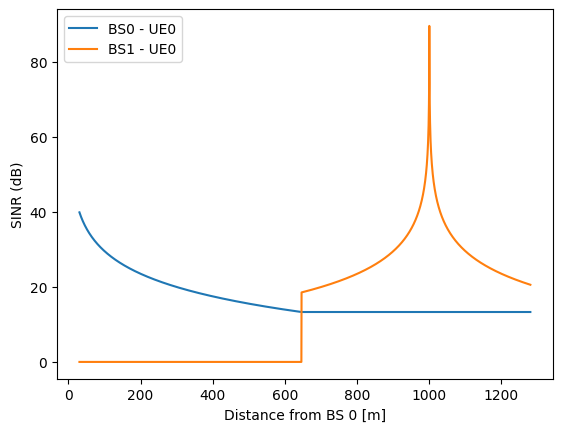

In [7]:
test4_3_df = pd.read_csv(NS3_HOME + "/contrib/defiance/experiments/results/test4_3.csv")

for col in test4_3_df.columns:
    test4_3_df[col] = test4_3_df[col].apply(convert_to_list)

test4_3_df = test4_3_df.drop(columns=["Unnamed: 0"])
plt.plot(test4_3_df.distances.apply(lambda x: x[0]), test4_3_df.sinrs.apply(lambda x: x[0][0]), label="BS0 - UE0")
plt.plot(test4_3_df.distances.apply(lambda x: x[0]), test4_3_df.sinrs.apply(lambda x: x[1][0]), label="BS1 - UE0")

plt.xlabel("Distance from BS 0 [m]")
plt.ylabel("SINR (dB)")
plt.legend()
plt.show()

### Test 4_2
- advanced handover test
- BS 0 at (0,0), BS 1 at (1000, 0)
- both BS transmit with the same transmit power the entire time (10 dBm)
- UE 0 starts at (0,0) with speed (100,0)
- UE 1 (1000, 500) and UE 2 (1000, 250) static
- with RLF detection enabled and strongest Cell handover

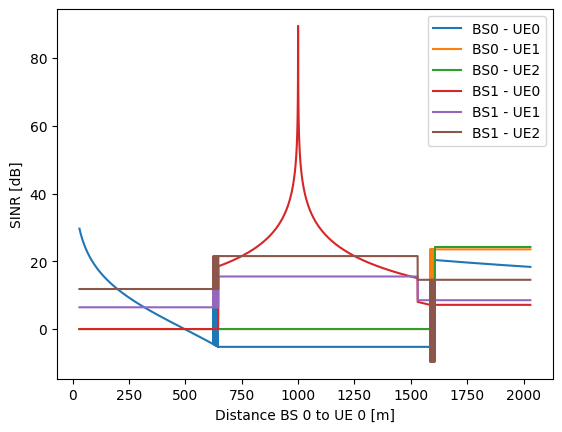

In [5]:
test4_2_df = pd.read_csv(NS3_HOME + "/contrib/defiance/experiments/results/test4_2.csv")

for col in test4_2_df.columns:
    test4_2_df[col] = test4_2_df[col].apply(convert_to_list)

test4_2_df = test4_2_df.drop(columns=["Unnamed: 0"])
plt.plot(test4_2_df.distances.apply(lambda x: x[0]), test4_2_df.sinrs.apply(lambda x: x[0][0]), label="BS0 - UE0")
plt.plot(test4_2_df.distances.apply(lambda x: x[0]), test4_2_df.sinrs.apply(lambda x: x[0][1]), label="BS0 - UE1")
plt.plot(test4_2_df.distances.apply(lambda x: x[0]), test4_2_df.sinrs.apply(lambda x: x[0][2]), label="BS0 - UE2")
plt.plot(test4_2_df.distances.apply(lambda x: x[0]), test4_2_df.sinrs.apply(lambda x: x[1][0]), label="BS1 - UE0")
plt.plot(test4_2_df.distances.apply(lambda x: x[0]), test4_2_df.sinrs.apply(lambda x: x[1][1]), label="BS1 - UE1")
plt.plot(test4_2_df.distances.apply(lambda x: x[0]), test4_2_df.sinrs.apply(lambda x: x[1][2]), label="BS1 - UE2")

plt.xlabel("Distance BS 0 to UE 0 [m]")
plt.ylabel("SINR [dB]")
plt.legend()
plt.show()

We will have to investigate the bump at around 600m. Why is the SINR for UE1 and 2 improving here?

### Test 4_3

The next testcase adds a new static UE to BS0 so that transmission is constantly happening.

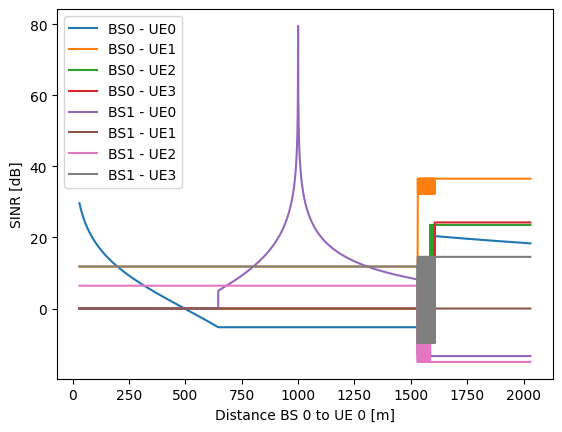

In [3]:
test4_3_df = pd.read_csv(NS3_HOME + "/contrib/defiance/experiments/results/test4_3.csv")


for col in test4_3_df.columns:
    test4_3_df[col] = test4_3_df[col].apply(convert_to_list)

test4_3_df = test4_3_df.drop(columns=["Unnamed: 0"])
plt.plot(test4_3_df.distances.apply(lambda x: x[0]), test4_3_df.sinrs.apply(lambda x: x[0][0]), label="BS0 - UE0")
plt.plot(test4_3_df.distances.apply(lambda x: x[0]), test4_3_df.sinrs.apply(lambda x: x[0][1]), label="BS0 - UE1")
plt.plot(test4_3_df.distances.apply(lambda x: x[0]), test4_3_df.sinrs.apply(lambda x: x[0][2]), label="BS0 - UE2")
plt.plot(test4_3_df.distances.apply(lambda x: x[0]), test4_3_df.sinrs.apply(lambda x: x[0][3]), label="BS0 - UE3")
plt.plot(test4_3_df.distances.apply(lambda x: x[0]), test4_3_df.sinrs.apply(lambda x: x[1][0]), label="BS1 - UE0")
plt.plot(test4_3_df.distances.apply(lambda x: x[0]), test4_3_df.sinrs.apply(lambda x: x[1][1]), label="BS1 - UE1")
plt.plot(test4_3_df.distances.apply(lambda x: x[0]), test4_3_df.sinrs.apply(lambda x: x[1][2]), label="BS1 - UE2")
plt.plot(test4_3_df.distances.apply(lambda x: x[0]), test4_3_df.sinrs.apply(lambda x: x[1][3]), label="BS1 - UE3")

plt.xlabel("Distance BS 0 to UE 0 [m]")
plt.ylabel("SINR [dB]")
plt.legend()
plt.show()

Assumption: The bump was observed because after the handover took place in the first scenario, BS0 did not need to transmit any longer -> no interference. In the second scenario it is still connected to UE 1 and therefore transmitting -> interference still happening

Also: The location of UEs does not have an effect on the interference??
We will be testing this with a propagation model that does not depend on distance, so we only have the interference effect but no degrading signal strength.

### Test 4_4

- Range prop model with max distance = 800

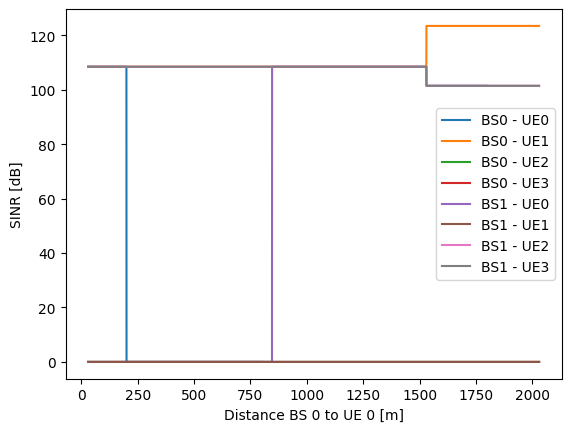

: 

In [4]:
test4_4_df = pd.read_csv(NS3_HOME + "/contrib/defiance/experiments/results/test4_4.csv")

for col in test4_4_df.columns:
    test4_4_df[col] = test4_4_df[col].apply(convert_to_list)

test4_4_df = test4_4_df.drop(columns=["Unnamed: 0"])
plt.plot(test4_4_df.distances.apply(lambda x: x[0]), test4_4_df.sinrs.apply(lambda x: x[0][0]), label="BS0 - UE0")
plt.plot(test4_4_df.distances.apply(lambda x: x[0]), test4_4_df.sinrs.apply(lambda x: x[0][1]), label="BS0 - UE1")
plt.plot(test4_4_df.distances.apply(lambda x: x[0]), test4_4_df.sinrs.apply(lambda x: x[0][2]), label="BS0 - UE2")
plt.plot(test4_4_df.distances.apply(lambda x: x[0]), test4_4_df.sinrs.apply(lambda x: x[0][3]), label="BS0 - UE3")
plt.plot(test4_4_df.distances.apply(lambda x: x[0]), test4_4_df.sinrs.apply(lambda x: x[1][0]), label="BS1 - UE0")
plt.plot(test4_4_df.distances.apply(lambda x: x[0]), test4_4_df.sinrs.apply(lambda x: x[1][1]), label="BS1 - UE1")
plt.plot(test4_4_df.distances.apply(lambda x: x[0]), test4_4_df.sinrs.apply(lambda x: x[1][2]), label="BS1 - UE2")
plt.plot(test4_4_df.distances.apply(lambda x: x[0]), test4_4_df.sinrs.apply(lambda x: x[1][3]), label="BS1 - UE3")

plt.xlabel("Distance BS 0 to UE 0 [m]")
plt.ylabel("SINR [dB]")
plt.legend()
plt.show()

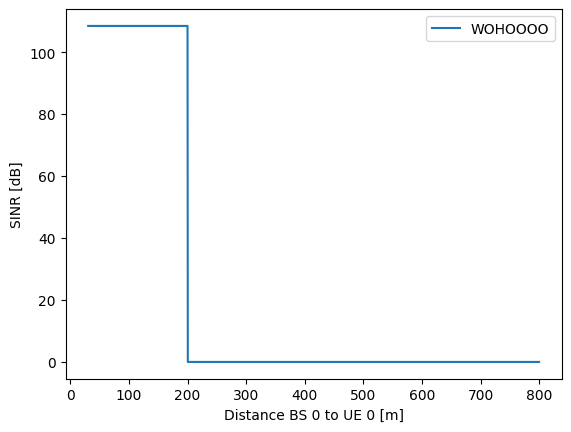

In [5]:
test4_4_df = pd.read_csv(NS3_HOME + "/contrib/defiance/experiments/results/test4_4.csv")

for col in test4_4_df.columns:
    test4_4_df[col] = test4_4_df[col].apply(convert_to_list)

test4_4_df = test4_4_df.drop(columns=["Unnamed: 0"])
plt.plot(test4_4_df.distances.apply(lambda x: x[0]), test4_4_df.sinrs.apply(lambda x: x[0][0]), label="WOHOOOO")

plt.xlabel("Distance BS 0 to UE 0 [m]")
plt.ylabel("SINR [dB]")
plt.legend()
plt.show()